In [40]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import itertools
import pandas as pd
from scipy import stats
from scipy.interpolate import interp1d
import json

## Conversion Rate plots


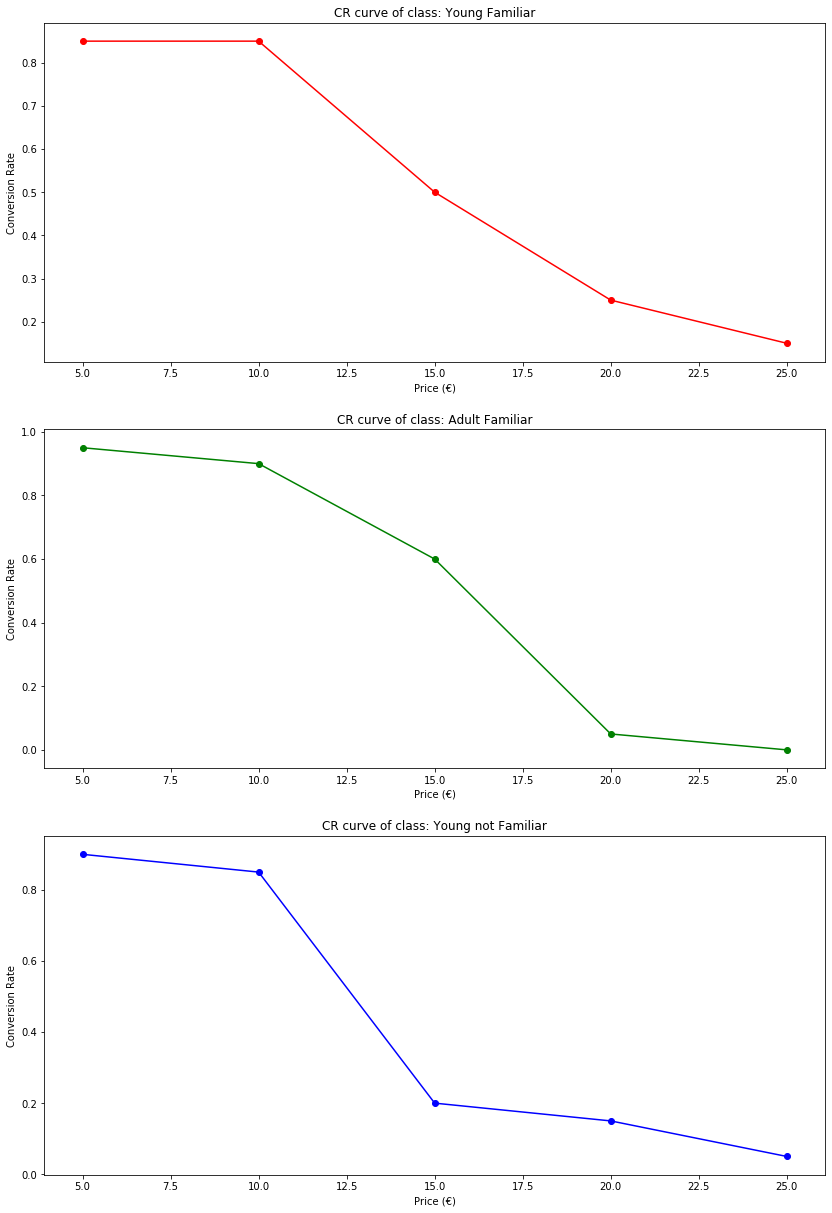

In [44]:
with open('Pricing/configs/pricing_env.json') as json_file:
    data = json.load(json_file)
campaign = data["campaigns"][0]

categories = [campaign["categories"][i] for i in range(len(campaign["categories"]))]
p_categories = np.array(campaign["p_categories"])
arms_candidates = np.array([5,10,15,20,25])  #TODO np.array(campaign["prices"])
aux_dict = {0:"Young Familiar", 1: "Adult Familiar", 2:"Young not Familiar"}

fig, axs = plt.subplots(3, figsize=(14,8))
plt.subplots_adjust(bottom=0.5, top = 2.5)

x = arms_candidates
colors = ['r', 'g', 'b']
for i in range(len(categories)):
    y = p_categories[i]
    smooth= interp1d(x, y, kind='cubic')
    axs[i].plot(x, smooth(x), color=colors[i])
    axs[i].scatter(x, y, color=colors[i])
    axs[i].set_title("CR curve of class: " + aux_dict[i])
    axs[i].set_xlabel("Price (€)")
    axs[i].set_ylabel("Conversion Rate")

plt.show()

